# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

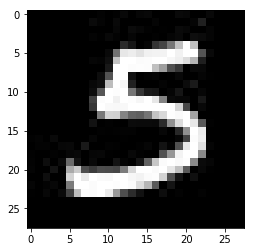

In [2]:
show_n_images = 1

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

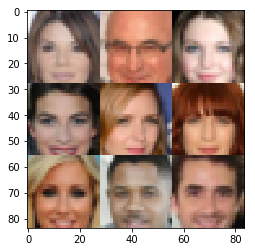

In [3]:
show_n_images = 10

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.15

        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'SAME')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, 2, 'SAME')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        conv3 = tf.layers.conv2d(lrelu2, 256, 5, 1, 'SAME')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        conv4 = tf.layers.conv2d(lrelu3, 512, 5, 1, 'SAME')
        batch_norm4 = tf.layers.batch_normalization(conv4, training=True)
        lrelu4 = tf.maximum(alpha * batch_norm4, batch_norm4)

        flat = tf.reshape(lrelu3, (-1, 7*7*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=False if is_train==True else True):
        alpha = 0.15
        
        fc1 = tf.reshape(tf.layers.dense(z, 7*7*512), (-1, 7, 7, 512))
        batch_norm1 = tf.layers.batch_normalization(fc1, training=is_train)
        lrelu1 = tf.maximum(alpha*batch_norm1, batch_norm1)
        
        conv2 = tf.layers.conv2d_transpose(fc1, 256, 3, 1, 'SAME')
        batch_norm2 = tf.layers.batch_normalization(conv2, training=is_train)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
        conv3 = tf.layers.conv2d_transpose(lrelu2, 128, 3, 1, 'SAME')
        batch_norm3 = tf.layers.batch_normalization(conv3, training=is_train)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
        conv4 = tf.layers.conv2d_transpose(lrelu3, 64, 3, 2, 'SAME')
        batch_norm4 = tf.layers.batch_normalization(conv4, training=is_train)
        lrelu4 = tf.maximum(alpha * batch_norm4, batch_norm4)
        
        logits = tf.layers.conv2d_transpose(lrelu4, out_channel_dim, 3, 2, 'SAME')
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(g_updates):
        d_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
        return d_train_ops, g_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, _ = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 25
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                
                #print out results every steps
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),"Discriminator Loss: {:.4f}...".format(train_loss_d),\
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.1984... Generator Loss: 1.0718
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 1.3767
Epoch 1/2... Discriminator Loss: 1.4914... Generator Loss: 1.2351
Epoch 1/2... Discriminator Loss: 1.0335... Generator Loss: 1.7581


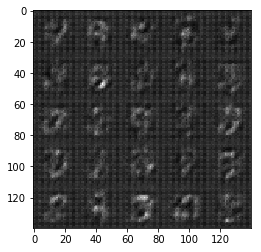

Epoch 1/2... Discriminator Loss: 1.3218... Generator Loss: 3.0312
Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 0.7777
Epoch 1/2... Discriminator Loss: 0.7175... Generator Loss: 2.0249
Epoch 1/2... Discriminator Loss: 0.8584... Generator Loss: 1.2141


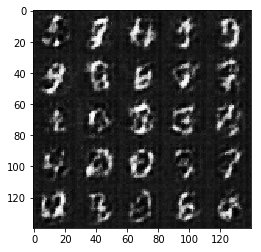

Epoch 1/2... Discriminator Loss: 1.0817... Generator Loss: 2.8078
Epoch 1/2... Discriminator Loss: 0.9043... Generator Loss: 2.6806
Epoch 1/2... Discriminator Loss: 1.9971... Generator Loss: 0.3180
Epoch 1/2... Discriminator Loss: 1.2272... Generator Loss: 0.6207


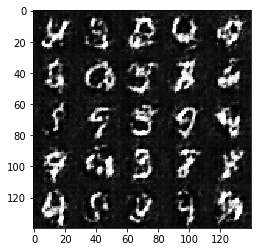

Epoch 1/2... Discriminator Loss: 1.9277... Generator Loss: 4.0054
Epoch 1/2... Discriminator Loss: 1.0664... Generator Loss: 2.0234
Epoch 1/2... Discriminator Loss: 1.0544... Generator Loss: 0.8273
Epoch 1/2... Discriminator Loss: 2.4519... Generator Loss: 0.2025


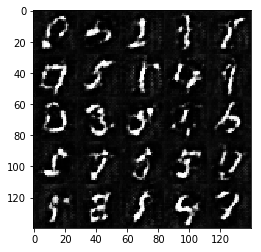

Epoch 1/2... Discriminator Loss: 1.0664... Generator Loss: 1.0652
Epoch 1/2... Discriminator Loss: 0.8204... Generator Loss: 1.5509
Epoch 1/2... Discriminator Loss: 1.3201... Generator Loss: 0.5612
Epoch 1/2... Discriminator Loss: 2.4697... Generator Loss: 0.1725


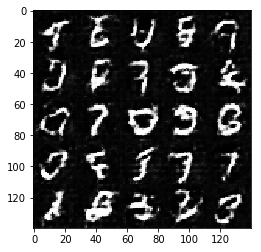

Epoch 1/2... Discriminator Loss: 1.1085... Generator Loss: 2.2695
Epoch 1/2... Discriminator Loss: 0.8763... Generator Loss: 1.0718
Epoch 1/2... Discriminator Loss: 1.6797... Generator Loss: 3.2810
Epoch 1/2... Discriminator Loss: 0.9350... Generator Loss: 1.2024


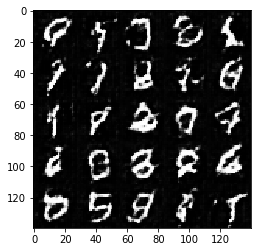

Epoch 1/2... Discriminator Loss: 1.0100... Generator Loss: 1.8266
Epoch 1/2... Discriminator Loss: 1.1169... Generator Loss: 0.7382
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 0.7864
Epoch 1/2... Discriminator Loss: 1.0039... Generator Loss: 0.9022


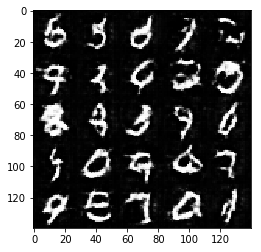

Epoch 1/2... Discriminator Loss: 1.0722... Generator Loss: 0.9101
Epoch 1/2... Discriminator Loss: 3.0594... Generator Loss: 4.0781
Epoch 1/2... Discriminator Loss: 0.7358... Generator Loss: 1.4836
Epoch 1/2... Discriminator Loss: 0.8935... Generator Loss: 1.3070


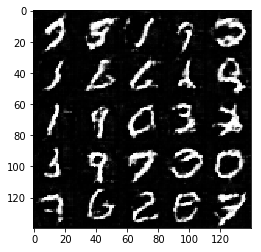

Epoch 1/2... Discriminator Loss: 0.9514... Generator Loss: 1.7959
Epoch 1/2... Discriminator Loss: 1.8167... Generator Loss: 0.3906
Epoch 1/2... Discriminator Loss: 2.2988... Generator Loss: 0.2784
Epoch 1/2... Discriminator Loss: 1.2087... Generator Loss: 0.7064


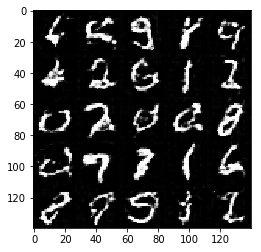

Epoch 1/2... Discriminator Loss: 0.9080... Generator Loss: 1.8517
Epoch 2/2... Discriminator Loss: 1.7184... Generator Loss: 0.3874
Epoch 2/2... Discriminator Loss: 2.1586... Generator Loss: 3.5134
Epoch 2/2... Discriminator Loss: 1.6889... Generator Loss: 0.3943


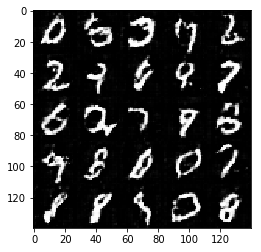

Epoch 2/2... Discriminator Loss: 2.1607... Generator Loss: 0.2526
Epoch 2/2... Discriminator Loss: 1.5074... Generator Loss: 0.4394
Epoch 2/2... Discriminator Loss: 2.2462... Generator Loss: 0.2689
Epoch 2/2... Discriminator Loss: 1.2670... Generator Loss: 3.0008


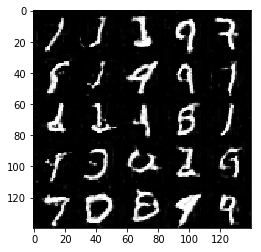

Epoch 2/2... Discriminator Loss: 0.9956... Generator Loss: 2.4717
Epoch 2/2... Discriminator Loss: 2.3806... Generator Loss: 0.2118
Epoch 2/2... Discriminator Loss: 1.4186... Generator Loss: 3.2035
Epoch 2/2... Discriminator Loss: 1.1592... Generator Loss: 2.4459


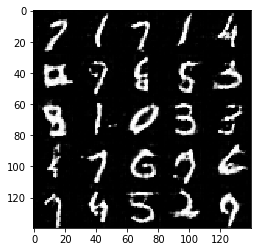

Epoch 2/2... Discriminator Loss: 1.3193... Generator Loss: 2.7247
Epoch 2/2... Discriminator Loss: 1.1663... Generator Loss: 2.9812
Epoch 2/2... Discriminator Loss: 1.0169... Generator Loss: 3.1461
Epoch 2/2... Discriminator Loss: 1.0660... Generator Loss: 2.6507


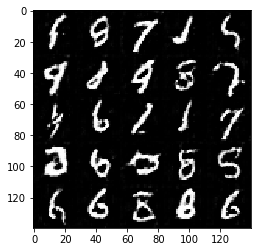

Epoch 2/2... Discriminator Loss: 1.7448... Generator Loss: 0.3955
Epoch 2/2... Discriminator Loss: 0.9147... Generator Loss: 2.9509
Epoch 2/2... Discriminator Loss: 0.8683... Generator Loss: 2.3048
Epoch 2/2... Discriminator Loss: 1.0746... Generator Loss: 0.8510


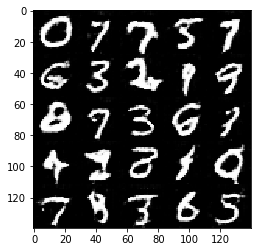

Epoch 2/2... Discriminator Loss: 0.8676... Generator Loss: 1.2044
Epoch 2/2... Discriminator Loss: 1.3954... Generator Loss: 0.6854
Epoch 2/2... Discriminator Loss: 1.2709... Generator Loss: 0.6792
Epoch 2/2... Discriminator Loss: 1.6708... Generator Loss: 3.2268


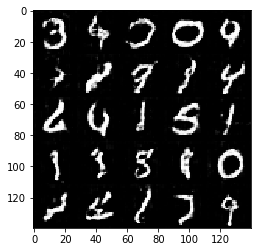

Epoch 2/2... Discriminator Loss: 2.6692... Generator Loss: 4.2890
Epoch 2/2... Discriminator Loss: 0.8287... Generator Loss: 2.2523
Epoch 2/2... Discriminator Loss: 1.0715... Generator Loss: 2.3564
Epoch 2/2... Discriminator Loss: 0.8538... Generator Loss: 1.2573


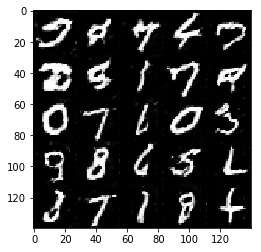

Epoch 2/2... Discriminator Loss: 0.8281... Generator Loss: 1.5683
Epoch 2/2... Discriminator Loss: 1.4898... Generator Loss: 3.6762
Epoch 2/2... Discriminator Loss: 1.0397... Generator Loss: 1.5530
Epoch 2/2... Discriminator Loss: 1.1785... Generator Loss: 3.0261


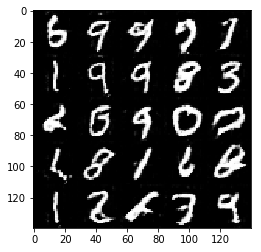

Epoch 2/2... Discriminator Loss: 0.9723... Generator Loss: 3.0654
Epoch 2/2... Discriminator Loss: 0.8366... Generator Loss: 1.1538
Epoch 2/2... Discriminator Loss: 1.0789... Generator Loss: 0.9596
Epoch 2/2... Discriminator Loss: 0.9456... Generator Loss: 2.5445


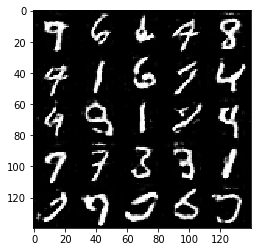

Epoch 2/2... Discriminator Loss: 1.0436... Generator Loss: 1.9815
Epoch 2/2... Discriminator Loss: 1.5559... Generator Loss: 0.4589


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.4242... Generator Loss: 0.1132
Epoch 1/1... Discriminator Loss: 2.2443... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 1.4341
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.6426


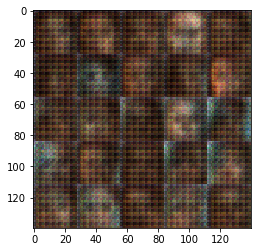

Epoch 1/1... Discriminator Loss: 1.7475... Generator Loss: 0.5304
Epoch 1/1... Discriminator Loss: 1.5496... Generator Loss: 0.5007
Epoch 1/1... Discriminator Loss: 1.7382... Generator Loss: 0.3513
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.8536


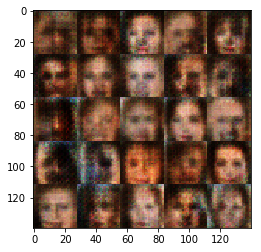

Epoch 1/1... Discriminator Loss: 1.5537... Generator Loss: 1.5206
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.5594... Generator Loss: 0.4278
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 0.9954


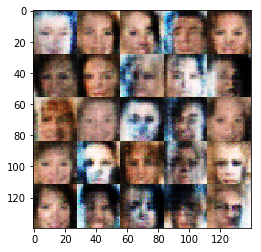

Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 1.3197
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.5627
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.6577
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.6454


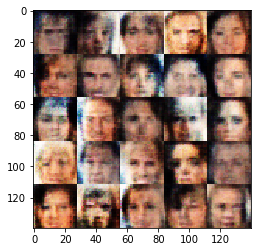

Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.2768... Generator Loss: 0.8547
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.8341


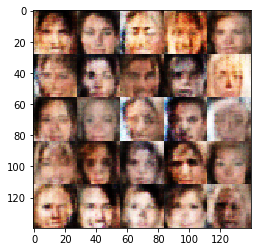

Epoch 1/1... Discriminator Loss: 1.5320... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 0.5207
Epoch 1/1... Discriminator Loss: 1.7242... Generator Loss: 0.3679
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.8249


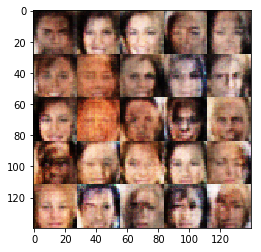

Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.5908
Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 0.6010
Epoch 1/1... Discriminator Loss: 1.3121... Generator Loss: 0.9733


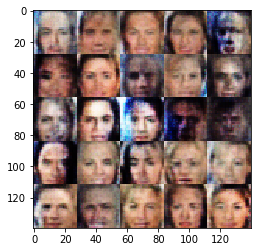

Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 1.2864
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.7735


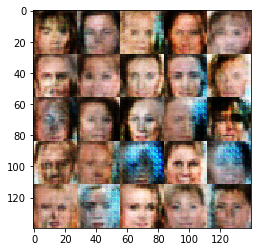

Epoch 1/1... Discriminator Loss: 1.2237... Generator Loss: 0.9624
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.7118
Epoch 1/1... Discriminator Loss: 0.9993... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.8198


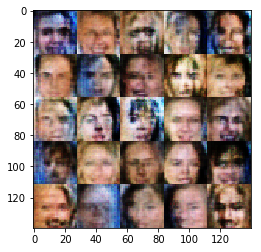

Epoch 1/1... Discriminator Loss: 2.6623... Generator Loss: 0.2849
Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 1.0873
Epoch 1/1... Discriminator Loss: 2.1713... Generator Loss: 0.2029
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.9766


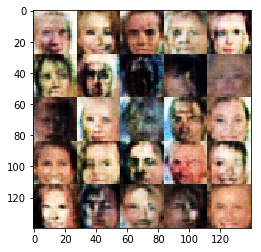

Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 0.9743
Epoch 1/1... Discriminator Loss: 1.2512... Generator Loss: 0.9468
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.8984
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.7315


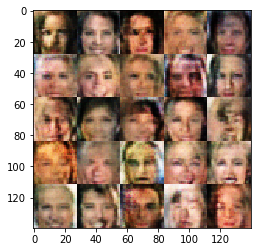

Epoch 1/1... Discriminator Loss: 1.2028... Generator Loss: 1.0482
Epoch 1/1... Discriminator Loss: 1.1862... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.7222... Generator Loss: 2.0759
Epoch 1/1... Discriminator Loss: 1.6545... Generator Loss: 0.4288


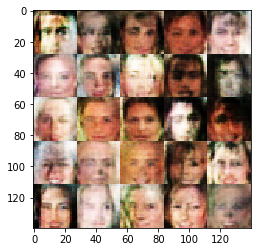

Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 0.5626
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 1.0749
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 1.4574... Generator Loss: 0.6878


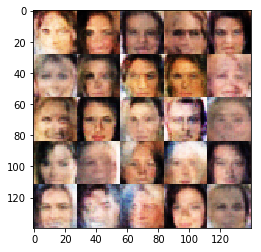

Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 1.0672
Epoch 1/1... Discriminator Loss: 2.1130... Generator Loss: 1.4618
Epoch 1/1... Discriminator Loss: 1.1182... Generator Loss: 0.8911
Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 1.4789


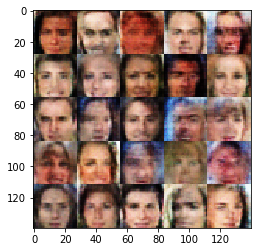

Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.1783... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.8990


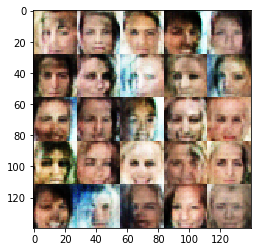

Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.1897... Generator Loss: 0.8319
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 1.0551
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 1.0859


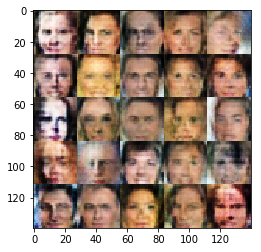

Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 1.2727
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.9374
Epoch 1/1... Discriminator Loss: 1.3427... Generator Loss: 1.2133
Epoch 1/1... Discriminator Loss: 1.0499... Generator Loss: 1.4987


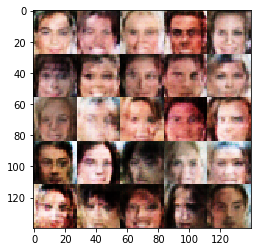

Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 0.6955
Epoch 1/1... Discriminator Loss: 1.1879... Generator Loss: 1.0460
Epoch 1/1... Discriminator Loss: 1.4763... Generator Loss: 0.4966
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.8470


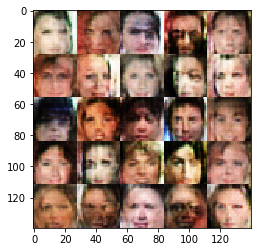

Epoch 1/1... Discriminator Loss: 1.2328... Generator Loss: 1.1824
Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.8132
Epoch 1/1... Discriminator Loss: 1.1685... Generator Loss: 0.6616


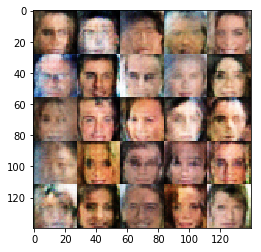

Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 1.1034
Epoch 1/1... Discriminator Loss: 1.6589... Generator Loss: 0.4743
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 0.9224


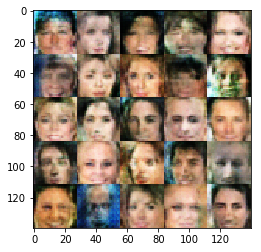

Epoch 1/1... Discriminator Loss: 1.5789... Generator Loss: 1.4093
Epoch 1/1... Discriminator Loss: 1.3562... Generator Loss: 1.0280
Epoch 1/1... Discriminator Loss: 0.9658... Generator Loss: 1.0950
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.5925


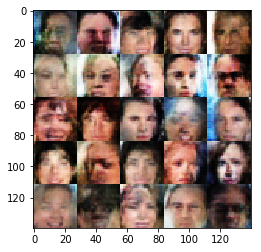

Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 1.1437
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 1.6078
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 1.2896
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 1.3134


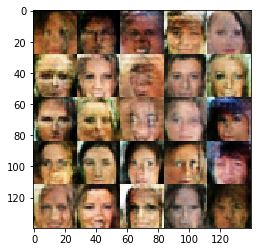

Epoch 1/1... Discriminator Loss: 1.2671... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.4934
Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 0.8384
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.6593


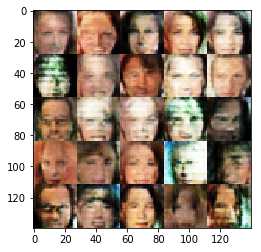

Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 1.0446
Epoch 1/1... Discriminator Loss: 1.2838... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.8463


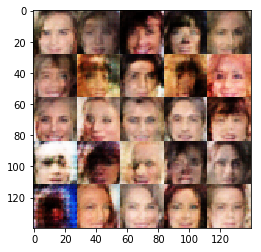

Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 1.0140
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.6715
Epoch 1/1... Discriminator Loss: 1.3178... Generator Loss: 1.2789
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 1.0090


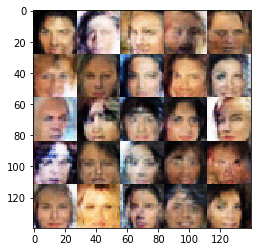

Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 0.9697
Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 0.9714
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 0.8285
Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 0.9868


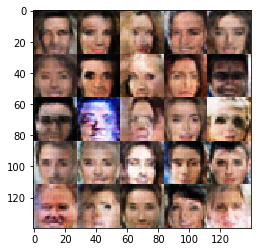

Epoch 1/1... Discriminator Loss: 1.2524... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 1.0250
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.7046


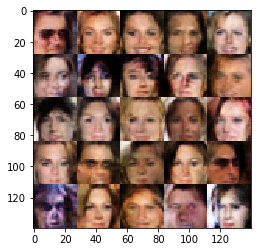

Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.9073
Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 1.3094... Generator Loss: 1.5152
Epoch 1/1... Discriminator Loss: 1.5002... Generator Loss: 0.7157


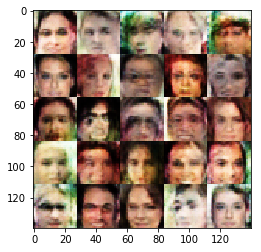

Epoch 1/1... Discriminator Loss: 2.4831... Generator Loss: 2.1623
Epoch 1/1... Discriminator Loss: 1.5462... Generator Loss: 0.8407
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 1.1452... Generator Loss: 0.6601


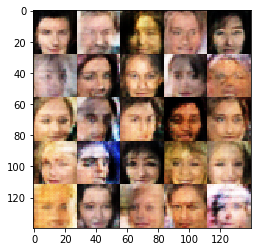

Epoch 1/1... Discriminator Loss: 1.4483... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 1.1974
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.7059


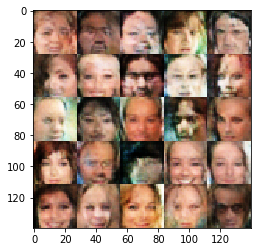

Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 0.8801
Epoch 1/1... Discriminator Loss: 1.1324... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.4886... Generator Loss: 0.5230
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 1.0165


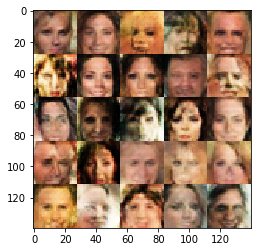

Epoch 1/1... Discriminator Loss: 1.5002... Generator Loss: 0.4618
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.5982


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.